In [1]:
## import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [4]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df['Classes'].value_counts()

fire             130
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [6]:
# Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
df['Classes'].value_counts()

1    136
0    105
Name: Classes, dtype: int64

In [9]:
# Independent features
X = df.drop('FWI',axis=1)

In [10]:
# Dependent features
y = df['FWI']

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
236    6.5
237    0.0
238    0.2
239    0.7
240    0.5
Name: FWI, Length: 241, dtype: float64

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
X_train.shape,y_train.shape

((180, 11), (180,))

In [15]:
## Feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650078,-0.281974,-0.325650,0.704387,0.505743,0.381551,0.632041,0.475403,0.551584,0.240943
RH,-0.650078,1.000000,0.239008,0.209370,-0.631723,-0.382121,-0.198864,-0.691216,-0.327193,-0.430592,-0.390069
Ws,-0.281974,0.239008,1.000000,0.258630,-0.170666,-0.004422,0.088472,0.018698,0.029760,-0.071895,-0.206797
Rain,-0.325650,0.209370,0.258630,1.000000,-0.523374,-0.266907,-0.285231,-0.325271,-0.278274,-0.341521,-0.087142
FFMC,0.704387,-0.631723,-0.170666,-0.523374,1.000000,0.603742,0.511944,0.740824,0.589933,0.770983,0.244224
DMC,0.505743,-0.382121,-0.004422,-0.266907,0.603742,1.000000,0.881018,0.662890,0.984351,0.598350,0.194944
DC,0.381551,-0.198864,0.088472,-0.285231,0.511944,0.881018,1.000000,0.507416,0.948605,0.512467,-0.091465
ISI,0.632041,-0.691216,0.018698,-0.325271,0.740824,0.662890,0.507416,1.000000,0.625170,0.737155,0.275756
BUI,0.475403,-0.327193,0.029760,-0.278274,0.589933,0.984351,0.948605,0.625170,1.000000,0.587610,0.092958
Classes,0.551584,-0.430592,-0.071895,-0.341521,0.770983,0.598350,0.512467,0.737155,0.587610,1.000000,0.180512


<AxesSubplot:>

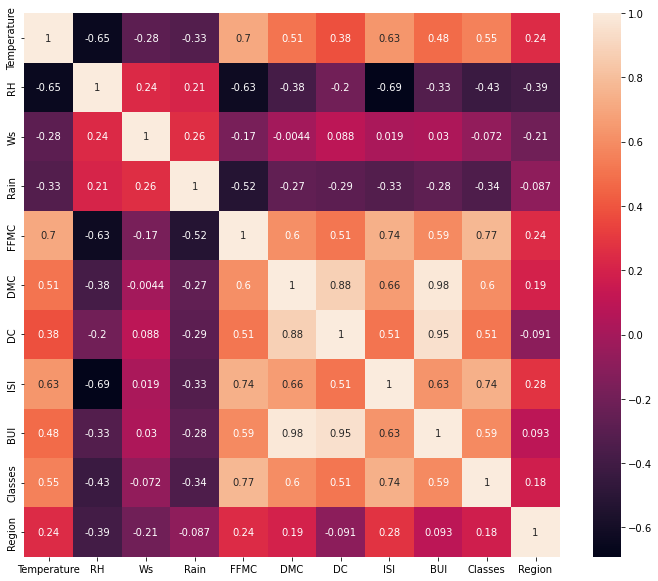

In [16]:
## Checking for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [17]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650078,-0.281974,-0.325650,0.704387,0.505743,0.381551,0.632041,0.475403,0.551584,0.240943
RH,-0.650078,1.000000,0.239008,0.209370,-0.631723,-0.382121,-0.198864,-0.691216,-0.327193,-0.430592,-0.390069
Ws,-0.281974,0.239008,1.000000,0.258630,-0.170666,-0.004422,0.088472,0.018698,0.029760,-0.071895,-0.206797
Rain,-0.325650,0.209370,0.258630,1.000000,-0.523374,-0.266907,-0.285231,-0.325271,-0.278274,-0.341521,-0.087142
FFMC,0.704387,-0.631723,-0.170666,-0.523374,1.000000,0.603742,0.511944,0.740824,0.589933,0.770983,0.244224
DMC,0.505743,-0.382121,-0.004422,-0.266907,0.603742,1.000000,0.881018,0.662890,0.984351,0.598350,0.194944
DC,0.381551,-0.198864,0.088472,-0.285231,0.511944,0.881018,1.000000,0.507416,0.948605,0.512467,-0.091465
ISI,0.632041,-0.691216,0.018698,-0.325271,0.740824,0.662890,0.507416,1.000000,0.625170,0.737155,0.275756
BUI,0.475403,-0.327193,0.029760,-0.278274,0.589933,0.984351,0.948605,0.625170,1.000000,0.587610,0.092958
Classes,0.551584,-0.430592,-0.071895,-0.341521,0.770983,0.598350,0.512467,0.737155,0.587610,1.000000,0.180512


In [18]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [19]:
## threshold -- Domain expertise
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [20]:
## Drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

((180, 9), (61, 9))

### Feature Scaling or Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled

array([[-0.81217704,  0.76845863,  1.2524011 , ..., -0.61364388,
        -1.09321633, -0.97801929],
       [-0.28440856,  0.63684821, -0.55684607, ..., -0.92132048,
        -1.09321633,  1.02247472],
       [ 2.09054955, -2.06116545, -0.19499664, ...,  2.81813356,
         0.91473203,  1.02247472],
       ...,
       [-1.86771398,  0.90006905,  0.52870223, ..., -1.06332507,
        -1.09321633, -0.97801929],
       [ 1.29889685, -0.48184038, -0.19499664, ...,  0.85373682,
         0.91473203,  1.02247472],
       [-0.5482928 ,  0.96587426,  1.97609997, ..., -0.85031819,
        -1.09321633, -0.97801929]])

In [39]:
## Saving the model
import pickle
file = open('../models/standardscaler.pkl','wb')
pickle.dump(scaler,file)
file.close()

### Box Plots to understand Effect Of Standard Scaler 

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'X_train After Scaling')

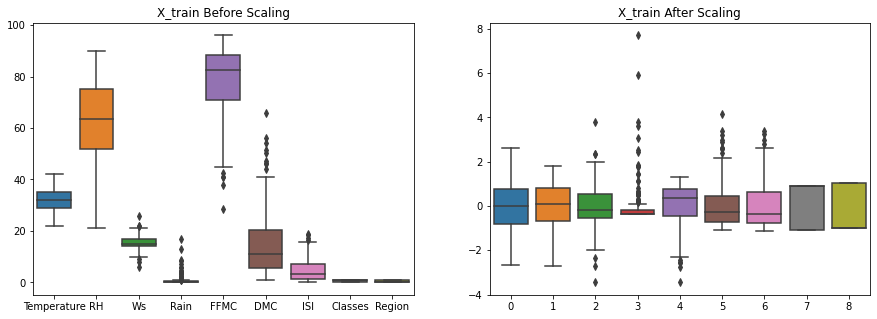

In [23]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

## Linear Regression Model

Mean absolute error 0.6184898468854098
R2 Score 0.9844810180430854


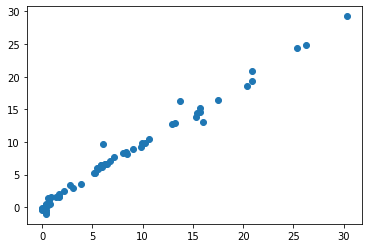

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute error 1.259109865991155
R2 Score 0.9464804212960706


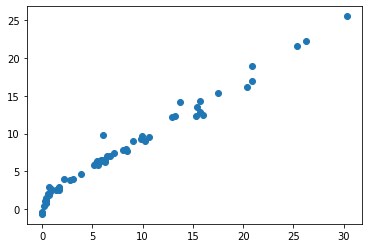

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Cross Validation Lasso

In [26]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean Absolute Error 0.6794641983054239
R2 Score 0.982579304803495


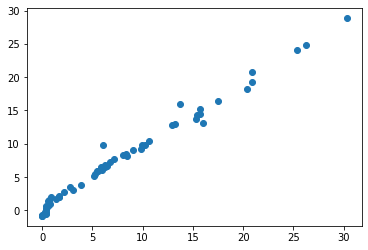

In [27]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error", mae)
print("R2 Score", score)

## Ridge Regression model

Mean Absolute Error 0.6447756387715966
R2 Score 0.9838245737106721


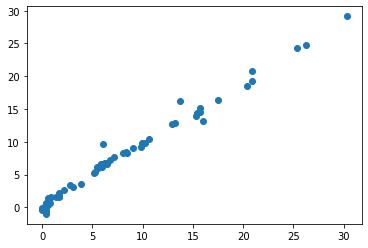

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error", mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

In [38]:
file = open('../models/ridge.pkl','wb')
pickle.dump(ridge,file)
file.close()

## Cross Validation Lasso

Mean Absolute Error 0.8738488940847805
R2 Score 0.9757431246454917


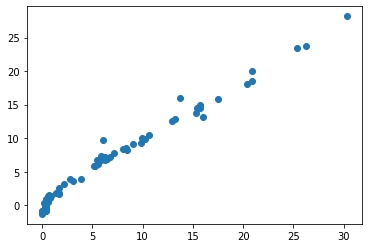

In [29]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

In [30]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elasticnet Regression

Mean Absolute Error 2.0033034722939984
R2 Score 0.8742209963600589


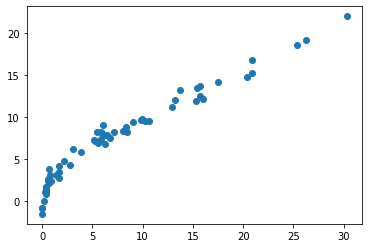

In [31]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

## Cross Validation ElasticNet

Mean Absolute Error 0.7232657607601457
R2 Score 0.9815171720230936


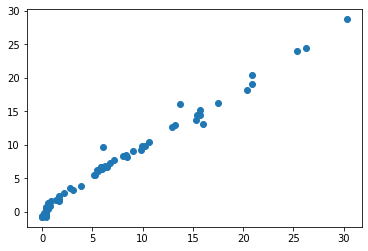

In [32]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

In [33]:
elasticcv.alphas_

array([13.58724389, 12.67150913, 11.81749182, 11.02103243, 10.27825173,
        9.58553196,  8.93949919,  8.33700686,  7.7751205 ,  7.2511034 ,
        6.7624033 ,  6.30663995,  5.88159353,  5.48519381,  5.1155101 ,
        4.77074184,  4.44920981,  4.14934796,  3.8696958 ,  3.60889125,
        3.36566406,  3.13882957,  2.92728296,  2.72999388,  2.54600143,
        2.37440946,  2.21438221,  2.06514026,  1.92595672,  1.79615368,
        1.67509893,  1.56220287,  1.45691563,  1.35872439,  1.26715091,
        1.18174918,  1.10210324,  1.02782517,  0.9585532 ,  0.89394992,
        0.83370069,  0.77751205,  0.72511034,  0.67624033,  0.630664  ,
        0.58815935,  0.54851938,  0.51155101,  0.47707418,  0.44492098,
        0.4149348 ,  0.38696958,  0.36088913,  0.33656641,  0.31388296,
        0.2927283 ,  0.27299939,  0.25460014,  0.23744095,  0.22143822,
        0.20651403,  0.19259567,  0.17961537,  0.16750989,  0.15622029,
        0.14569156,  0.13587244,  0.12671509,  0.11817492,  0.11